In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import keras
import tensorflow.keras.utils as np_utils

In [7]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [8]:
print("Training images : {}".format(X_train.shape))
print("Testing images : {}".format(X_test.shape))

Training images : (50000, 32, 32, 3)
Testing images : (10000, 32, 32, 3)


In [9]:
print(X_train[0].shape)

(32, 32, 3)


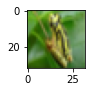

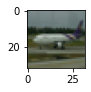

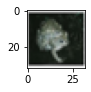

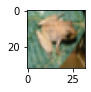

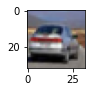

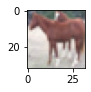

In [10]:
for i in range(232,238):
  plt.subplot(120+1+i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

In [11]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding : ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding: ",Y_train.shape)

Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D

In [14]:
mod = Sequential()
#For Convolutional Layers
mod.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same',input_shape = (32,32,3)))


mod.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same',input_shape = (32,32,3)))
mod.add(MaxPool2D(pool_size=(2,2)))
mod.add(Dropout(0.25))

mod.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same',input_shape=(32,32,3)))
mod.add(MaxPool2D(pool_size=(2,2)))
mod.add(Dropout(0.25))

mod.add(Flatten())

#For Hidden Layers
mod.add(Dense(500,activation='relu'))
mod.add(Dropout(0.4))

mod.add(Dense(250,activation = 'relu'))
mod.add(Dropout(0.3))
# Output Layers
mod.add(Dense(10,activation='softmax'))

In [15]:
# compiling the mod
mod.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
#Training the model
mod.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 553s 1s/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 545s 1s/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 546s 1s/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 540s 1s/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 538s 1s/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 534s 1s/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 534s 1s/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000

In [16]:
 classes= range(0,10)

 names = ['aeroplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

In [17]:
#Make a dictionary with classes and names
class_labels = dict(zip(classes,names))

In [18]:
#generate batch of 8 images to generate
batch = X_test[100:108]
labels = np.argmax(Y_test[100:108],axis=1)

In [19]:
#make predictions
predictions = mod.predict(batch,verbose=0)

In [20]:
print(predictions)

[[0.10581215 0.09985109 0.11014406 0.08663809 0.11044067 0.10609464
  0.09638145 0.08604524 0.10410726 0.09448532]
 [0.10698265 0.10328961 0.10701874 0.08591546 0.11020079 0.10940945
  0.09631635 0.08630954 0.10404385 0.09051358]
 [0.10027336 0.1002072  0.09673278 0.09157268 0.10022118 0.10811656
  0.09692793 0.0996167  0.11470784 0.09162377]
 [0.10709693 0.10122517 0.10930652 0.08269578 0.11107786 0.10376951
  0.09350137 0.09008968 0.10996356 0.09127357]
 [0.10748971 0.09775086 0.10552058 0.0852237  0.10850055 0.1089713
  0.09766442 0.08890008 0.1074722  0.09250662]
 [0.11338373 0.09985618 0.10830151 0.08004294 0.11187136 0.10619376
  0.0964715  0.08534794 0.1124301  0.08610095]
 [0.10520022 0.09759723 0.10598445 0.09065834 0.10787032 0.10471267
  0.09655842 0.09012647 0.1073336  0.09395832]
 [0.10126419 0.09965422 0.10259975 0.09165143 0.10119344 0.10570041
  0.09847479 0.09554796 0.10798717 0.09592662]]


In [21]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0
0.9999999
1.0
0.99999994
1.0
1.0


In [22]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 4 8 4 5 0 4 8]


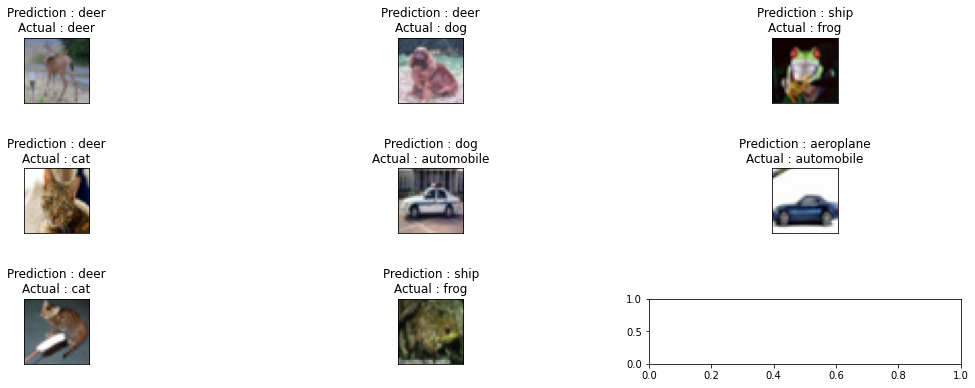

In [27]:
fig,axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction : {}\nActual : {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)


#show the plot
plt.show()